# Pruebas de concepto de Prophet

https://vijayv500.medium.com/time-series-forecasting-using-facebooks-prophet-in-python-1e13ea20a52b

In [3]:
from pandas import read_csv
from matplotlib import pyplot

path = './data/AirPassengers.csv'
df = read_csv(path)
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [24]:
df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


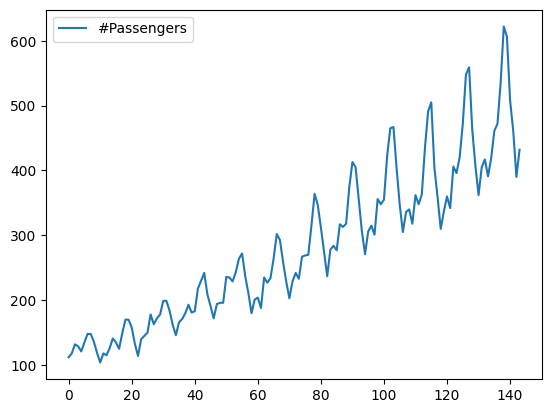

In [6]:
df.plot()
pyplot.show()
# X axis are months

## Fitting the model

In [8]:
# convert column to datetime object
from pandas import to_datetime

df.columns = ['ds', 'y']        # Fixed by prophet
df['ds'] = to_datetime(df['ds'])    # Force convert month to datetime object
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
from prophet import Prophet

model = Prophet()
model.fit(df)

10:23:44 - cmdstanpy - INFO - Chain [1] start processing
10:23:44 - cmdstanpy - INFO - Chain [1] done processing


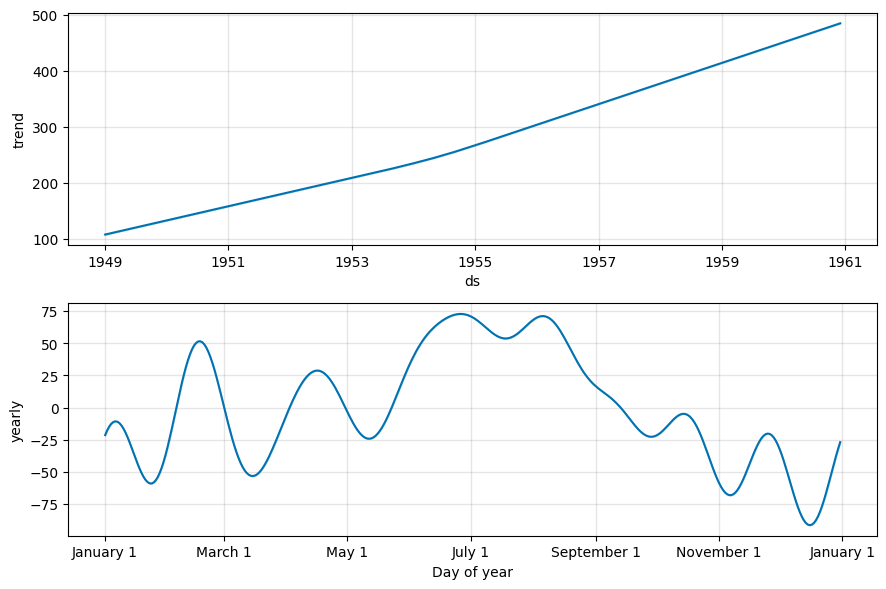

In [19]:
# Plotting number of passengers travelled is generally increasin and it peaks around July

model.plot_components(model.predict(df))
pyplot.show()

## Forecast on in-sample data

In [12]:
last_12months = df[132:]
forecast = model.predict(last_12months)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat  yhat_lower  yhat_upper
0 1960-01-01  426.190128  398.434405  452.851978
1 1960-02-01  419.170997  390.855559  447.013308
2 1960-03-01  454.777512  427.106175  483.447893
3 1960-04-01  455.970002  427.877493  482.915909
4 1960-05-01  458.561801  431.662322  487.905426


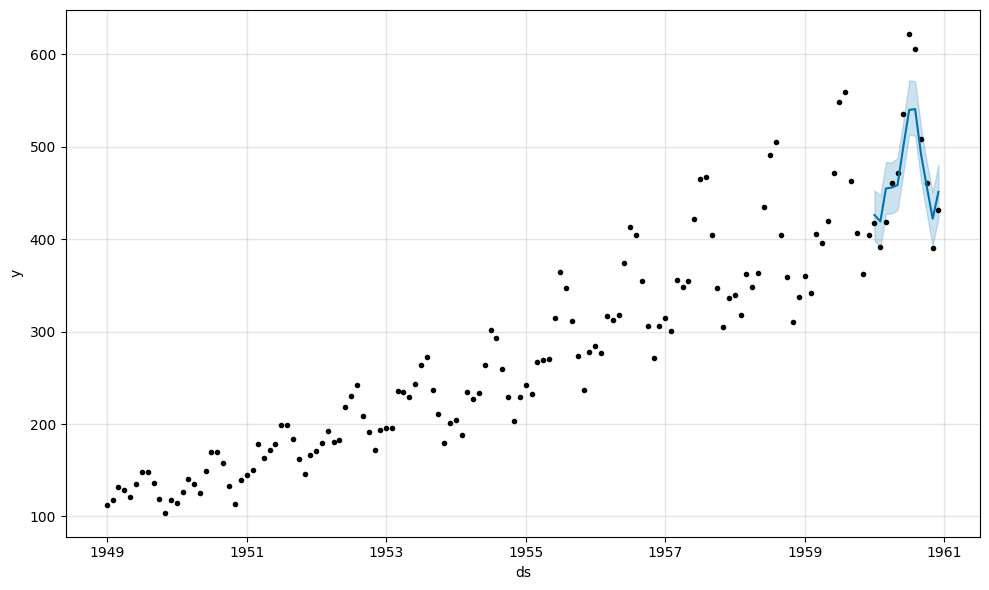

In [13]:
model.plot(forecast)
pyplot.show()

# dots -> training data
# blue -> forecast for last 12 months
# blue shaded -> upper and lower bounds (confidence)

## Forecast on out-of-sample data

In [15]:
future = model.make_future_dataframe(periods=12*5, freq='M')
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
199,1965-07-31,723.247756,693.732359,752.180387,656.297344,649.498232,663.013798
200,1965-08-31,677.355217,646.141584,706.024983,659.423446,652.439837,666.327121
201,1965-09-30,640.131749,608.379760,671.448581,662.448705,655.256371,669.551592
202,1965-10-31,610.360436,580.852292,641.877067,665.574806,658.208206,672.803310
203,1965-11-30,639.977562,608.740352,670.044913,668.600066,661.060832,675.913754


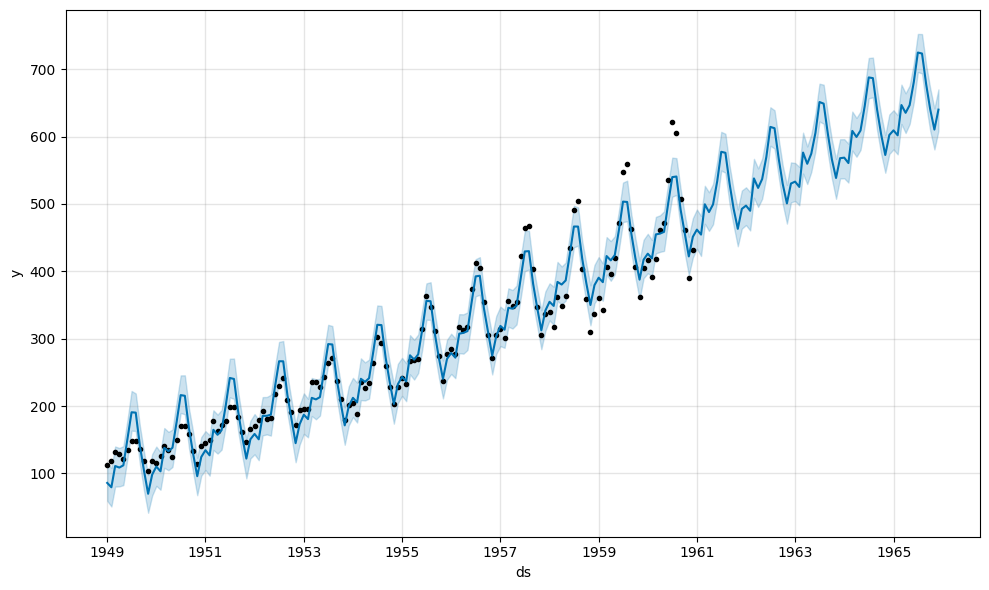

In [18]:
model.plot(forecast)
pyplot.show()

## Mean Absolute Error

Evaluate the model calculating MAE.

This can be done by holding back last few months of data during training and predict for the same duration using our model. As the values for the last 12 months are already known to us, we can calculate the error between the predictions and actual values.

10:39:21 - cmdstanpy - INFO - Chain [1] start processing
10:39:21 - cmdstanpy - INFO - Chain [1] done processing


MAE: 33.441686851052175


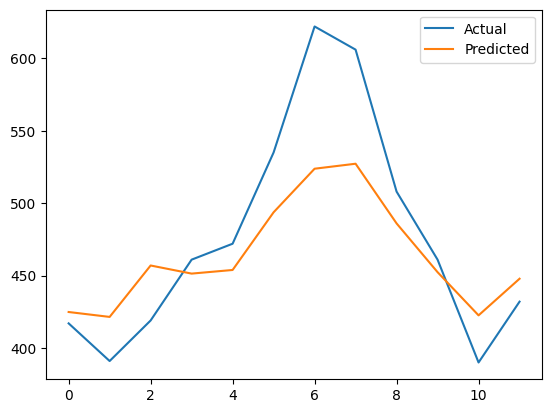

In [23]:
model = Prophet()

exclude_last_12months = df[:132]
last_12months = df[132:]
model.fit(exclude_last_12months)

forecast = model.predict(last_12months)

y_true = df['y'][132:].values
y_pred = forecast['yhat'].values

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
print(f"MAE: {mae}")

pyplot.plot(y_true, label="Actual")
pyplot.plot(y_pred, label="Predicted")
pyplot.legend()
pyplot.show()

# Moar tutorials

* https://pbpython.com/prophet-overview.html
* https://www.kaggle.com/code/sudosudoohio/forecasting-web-traffic-with-prophet-in-python/notebook
* GOLD: https://mkang32.github.io/python/2020/12/15/prophet-intro.html